In [23]:
# import libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # for plotting


In [24]:
df = pd.read_csv('melb_data.csv')
print("Dataset loaded successfully.")

Dataset loaded successfully.


In [25]:
print("First 5 rows of the dataset:")
print(df.head())
print("\n")

First 5 rows of the dataset:
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude    

In [26]:
print("Info about the dataset:")
df.info()
print("\n")

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-n

In [27]:
selected_features = ['Price', 'Landsize', 'Rooms', 'Bathroom', 'Bedroom2', 'Distance', 'Propertycount']
df_selected = df[selected_features].copy() # Use .copy() to avoid SettingWithCopyWarning

# Check for missing values in our selected columns
print("Missing values BEFORE handling:")
print(df_selected.isnull().sum())
print("\n")

Missing values BEFORE handling:
Price            0
Landsize         0
Rooms            0
Bathroom         0
Bedroom2         0
Distance         0
Propertycount    0
dtype: int64




In [28]:
# Handle missing values by filling with the mean of the column
for column in df_selected.columns:
    if df_selected[column].isnull().any():
        df_selected.loc[:, column] = df_selected[column].fillna(df_selected[column].mean())

print("Missing values AFTER handling (filling with mean):")
print(df_selected.isnull().sum())
print("\n")

Missing values AFTER handling (filling with mean):
Price            0
Landsize         0
Rooms            0
Bathroom         0
Bedroom2         0
Distance         0
Propertycount    0
dtype: int64




In [29]:
k = 3

try:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
except ValueError: # For older scikit-learn versions that don't support 'auto'
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)

kmeans.fit(df_selected)

cluster_labels = kmeans.labels_

df['Cluster'] = cluster_labels

In [30]:
print("First 5 rows of the dataset with Cluster labels:")
print(df.head())
print("\n")

# How many houses are in each cluster
print("Count of houses in each cluster:")
print(df['Cluster'].value_counts())
print("\n")

First 5 rows of the dataset with Cluster labels:
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Car  Landsize  BuildingArea  YearBuilt  \
0  3/12/2016       2.5    3067.0  ...  1.0     202.0           NaN        NaN   
1  4/02/2016       2.5    3067.0  ...  0.0     156.0          79.0     1900.0   
2  4/03/2017       2.5    3067.0  ...  0.0     134.0         150.0     1900.0   
3  4/03/2017       2.5    3067.0  ...  1.0      94.0           NaN        NaN   
4  4/06/2016       2.5    3067.0  ...  2.0     120.0         142.0     2014.0   

   CouncilArea  Lattitude

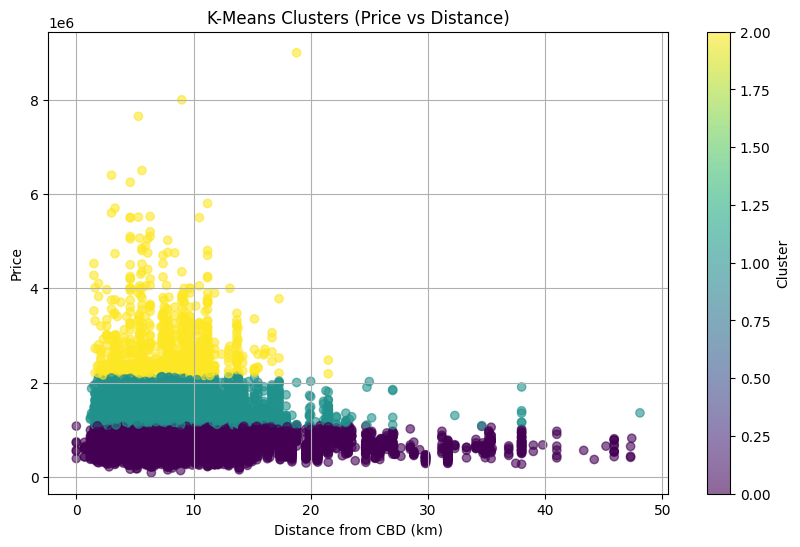

Clustering complete.


In [31]:
df_for_plot = df.dropna(subset=['Price', 'Distance', 'Cluster'])


plt.figure(figsize=(10, 6))

try:
    plt.scatter(df_for_plot['Distance'], df_for_plot['Price'], c=df_for_plot['Cluster'], cmap='viridis', alpha=0.6)
    plt.title('K-Means Clusters (Price vs Distance)')
    plt.xlabel('Distance from CBD (km)')
    plt.ylabel('Price')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()
    print("Clustering complete.")
except Exception as e:
    print(f"Could not generate plot. Error: {e}")

